In [206]:
#Autoreload to be able to tweak source code in the fly without restarting kernel
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
%autoreload 2

In [208]:
import aligater as ag

In [351]:
fcsList=ag.collectFiles("/media/ludvig/Project_Storage/GAIM/data/GAIM_fcs/01-03-2016/plate 1", lFilter=["B cells_A5"])

Collected 1 files, 92 files did not pass filter(s) and mask(s).

In [352]:
fcsDF = ag.loadFCS(fcsList[0], compensate=True)

Opening file B cells_A5_A05_031 from folder /01-03-2016/plate 1
Loaded dataset with 500000 events.
Marker labels: IgA CD27 CD34 CD19 IgD CD45 CD38 CD24 

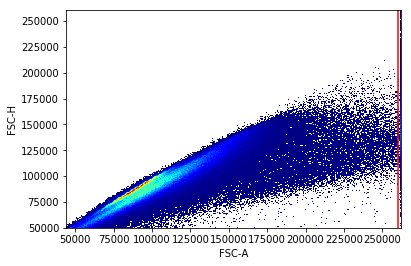

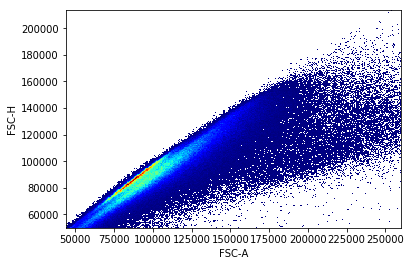

After gating, 492630 out of 500000 events remain.

In [353]:
no_clutter=ag.gateThreshold(fcsDF,"FSC-A", "FSC-H",thresh=260000, orientation='vertical',population="lower")

After gating, 476963 out of 492630 events remain.

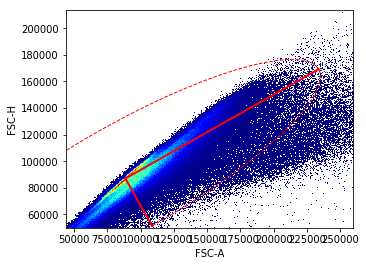

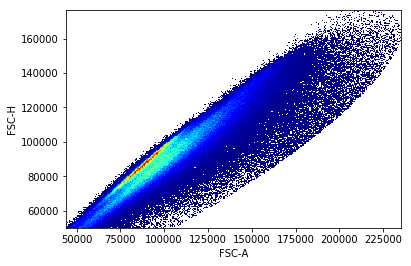

In [354]:
singlets=ag.gatePC(fcsDF,"FSC-A", "FSC-H",center='density',widthScale=4, heightScale=4, vI=no_clutter, plot=True)

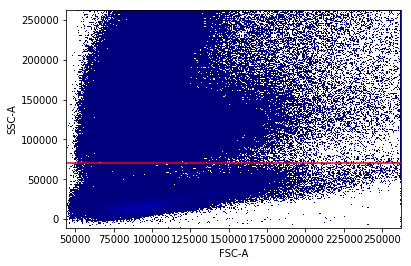

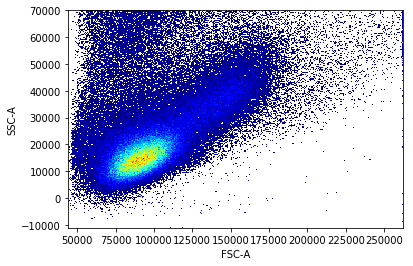

After gating, 206010 out of 500000 events remain.

In [355]:
PBMCstep1=ag.gateThreshold(fcsDF,xCol="FSC-A",yCol="SSC-A",orientation="horisontal",thresh=70000,population="lower")

After gating, 188086 out of 206010 events remain.

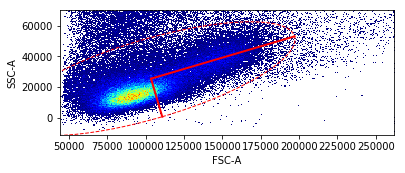

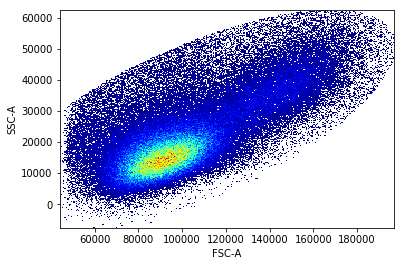

In [356]:
PBMC=ag.gatePC(fcsDF,"FSC-A","SSC-A",center='centroid',widthScale=3, heightScale=2, vI=PBMCstep1, plot=True)

In [357]:
mean, sigma, maxVal=ag.axisStats(fcsDF, "CD34", PBMC)
sigma*3

1939.7204473982715

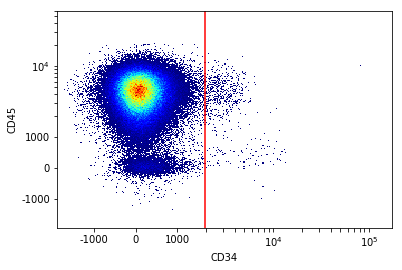

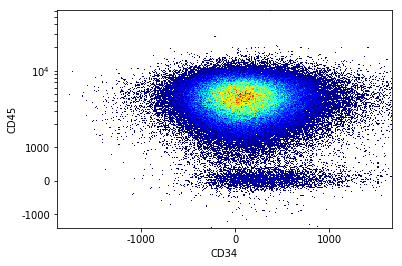

After gating, 187193 out of 188086 events remain.

In [358]:
CD45step1 = ag.gateThreshold(fcsDF, "CD34", "CD45", orientation='vertical', vI=PBMC,population="lower",thresh=3*sigma, scale='logish')

In [359]:
lim = ag.valleySeek(fcsDF, "CD45",vI=CD45step1,interval=[0,2500],sigma=2,bins=1000)

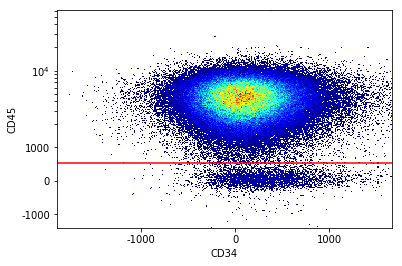

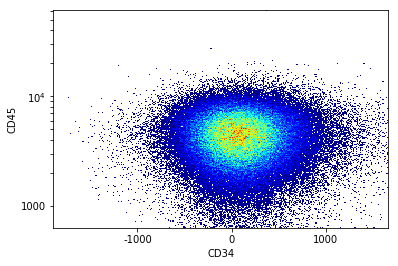

After gating, 181614 out of 187193 events remain.

In [360]:
CD45pos = ag.gateThreshold(fcsDF, "CD34", "CD45", vI=CD45step1, orientation='horisontal',thresh=lim,scale='logish') 

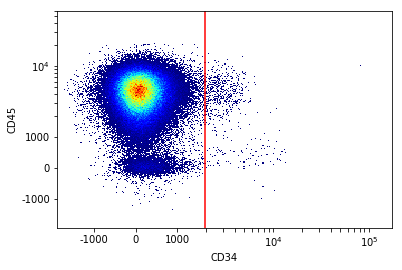

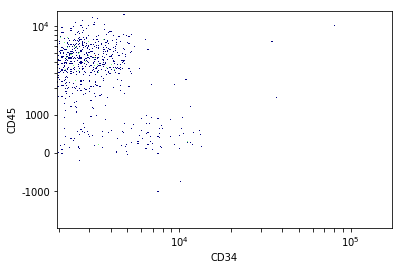

After gating, 893 out of 188086 events remain.

In [361]:
CD34step1=ag.gateThreshold(fcsDF, "CD34", "CD45", orientation='vertical', vI=PBMC,population="upper",thresh=3*sigma, scale='logish')

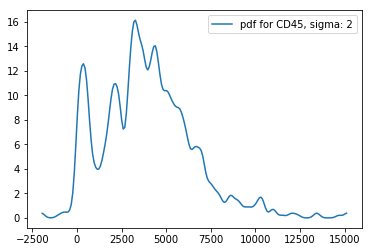

In [362]:
ag.plot_densityFunc(fcsDF,"CD45", vI=CD34step1,sigma=2,bins=200)

In [363]:
lim=ag.valleySeek(fcsDF, "CD45",vI=CD34step1,interval=[500,2500],sigma=2,bins=200)
lim

1161.6893813284689

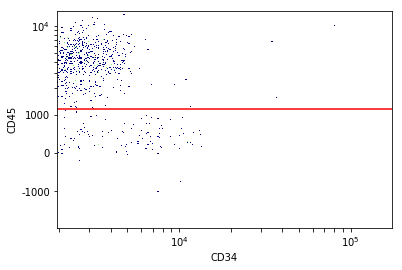

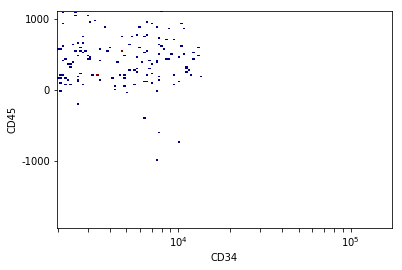

After gating, 136 out of 893 events remain.

In [364]:
CD34pos=ag.gateThreshold(fcsDF, "CD34", "CD45", orientation='horisontal', vI=CD34step1,population="lower",thresh=lim, scale='logish')

(<matplotlib.figure.Figure at 0x7f351088c208>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f350ff2d668>)

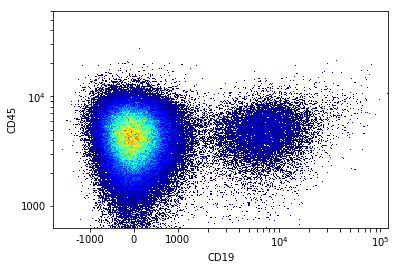

In [365]:
ag.plotHeatmap(fcsDF, "CD19","CD45",vI=CD45pos,scale='logish')

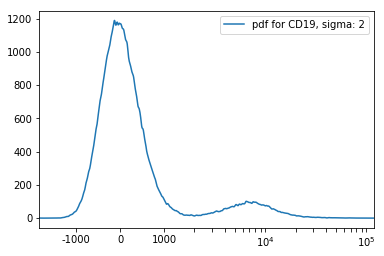

In [366]:
ag.plot_densityFunc(fcsDF,xCol="CD19",vI=CD45pos, bins=1000, sigma=2, scale='logish')

In [367]:
lim=ag.valleySeek(fcsDF,xCol="CD19",vI=CD45pos,interval=[0,2000],bins=1000,sigma=2, scale='logish')

In [368]:
lim

1994.0322004638574

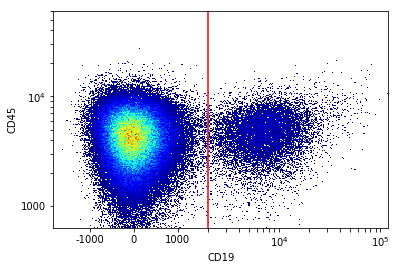

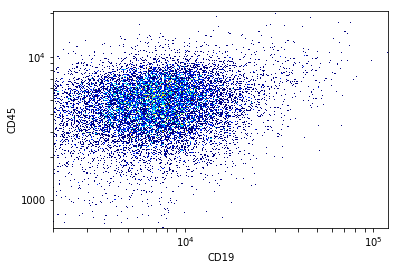

After gating, 17052 out of 181614 events remain.

In [369]:
CD19pos=ag.gateThreshold(fcsDF,"CD19","CD45",vI=CD45pos,thresh=lim,scale='logish',orientation='vertical',population='upper')

(<matplotlib.figure.Figure at 0x7f3510478f28>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f35181d3278>)

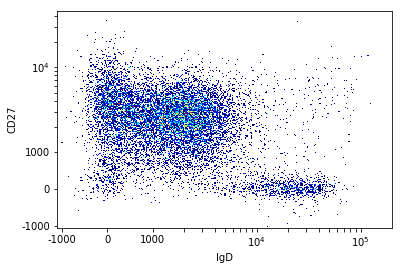

In [370]:
ag.plotHeatmap(fcsDF, "IgD", "CD27", vI=CD19pos,scale="logish",bins=300)

In [371]:
xlim=ag.valleySeek(fcsDF,"IgD", CD19pos, interval=[500,2500],bins=300,sigma=2, scale='logish')

In [372]:
ylim=ag.valleySeek(fcsDF,"CD27", CD19pos, interval=[500,1000],bins=300,sigma=2, scale='logish')

Input quadgate solution score: 0.854688588887

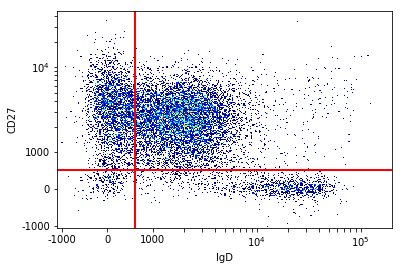

Tested 20 solution(s) excluding the input solution
Best solution had score: 0.851141911285

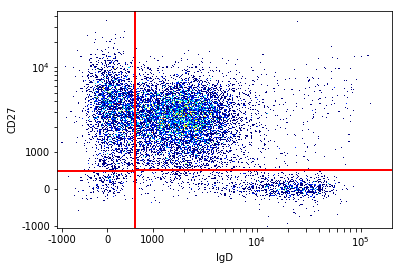

In [373]:
switchB, preSwitchB,naiveB, exhaustedB, solution = ag.variableQuadGate(fcsDF, "IgD", "CD27", xThresh=xlim, yThresh=ylim, testRange=[500,7000], position='left', vI=CD19pos,scale='logish', plot=True)

In [374]:
solution

[601.38126772788269, 601.38126772788269, 500.0, 512.35975190190732]

In [376]:
mean, sigma, maxVal = ag.axisStats(fcsDF, "CD38", vI=switchB)

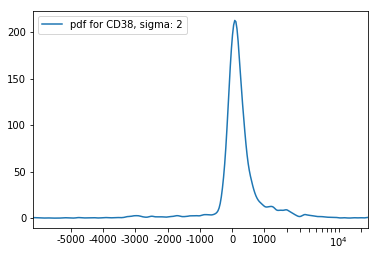

In [377]:
ag.plot_densityFunc(fcsDF,"CD38",switchB,scale='logish',bins=300,sigma=2)

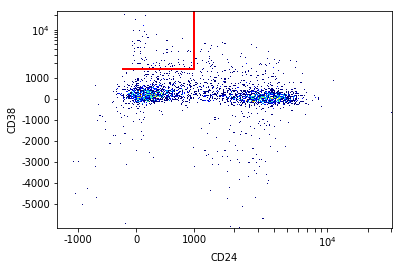

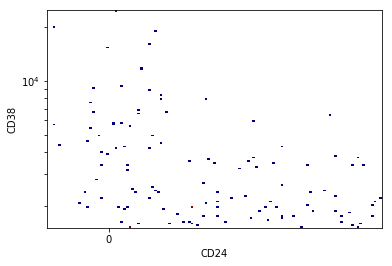

After gating, 119 out of 4102 events remain.

In [378]:
plasmablasts=ag.gateCorner(fcsDF, "CD24", "CD38",1000,mean+sigma,"lower","upper", vI=switchB,scale='logish')

In [379]:
xmean,xsigma,xmaxVal = ag.axisStats(fcsDF,xCol="CD24",vI=naiveB)

In [380]:
ymean,ysigma,ymaxVal = ag.axisStats(fcsDF,xCol="CD38",vI=naiveB)

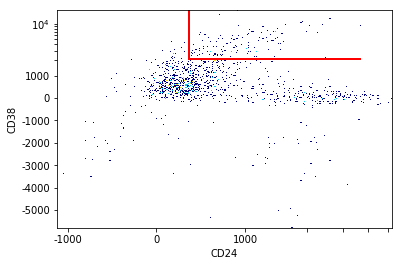

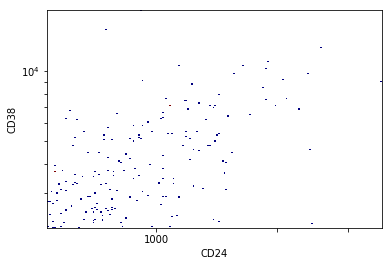

After gating, 184 out of 1633 events remain.

In [381]:
transitionals=ag.gateCorner(fcsDF,"CD24", "CD38",xThresh = xmaxVal, yThresh=ymaxVal+2000, vI=naiveB, scale='logish')

In [382]:
lim = ag.valleySeek(fcsDF,"IgA",vI=switchB,interval=[750,2000],bins=300, sigma=0, scale='logish')
lim

970.34346597219246

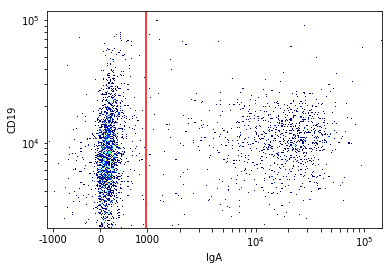

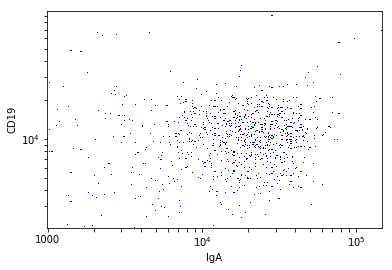

After gating, 1289 out of 4102 events remain.

In [383]:
IgApos=ag.gateThreshold(fcsDF, "IgA","CD19", orientation='vertical', vI=switchB, thresh=lim, scale='logish')